In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from jumpadjust import JumpAdjust
from noiseadjust import NoiseAdjust
from volatility import VarianceEstimation
from evaluation import InformationMeasure
from glob import glob 
dfs = []
for f in glob("./mid_1s/??-??_1s.csv.zst"):
    df = pd.read_csv(f, parse_dates=True, index_col=0)
    dfs.append(df)
df = pd.concat(dfs).sort_index()
df = df.loc["2020":"2020-09-02"]

x = df["BTC-USDT_bitfinex"].ffill().bfill().values

<Axes: title={'center': 'Jump adjust (Truncation at 1 sigma)'}>

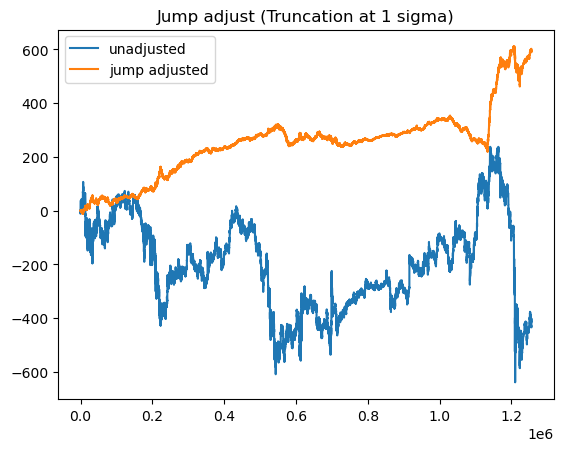

In [2]:
jumpadjust = JumpAdjust(x)
adjusted, _ = jumpadjust.truncate()
df_adjust = pd.DataFrame({"unadjusted":x-x[0]+adjusted[0], "jump adjusted":adjusted})
df_adjust.plot(title="Jump adjust (Truncation at 1 sigma)")

<Axes: title={'center': 'Estimated threshold'}>

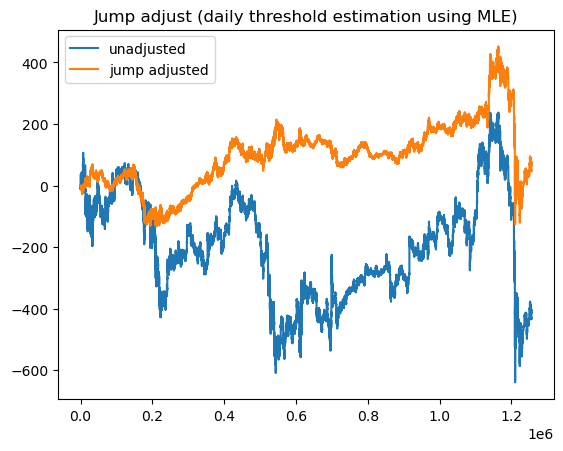

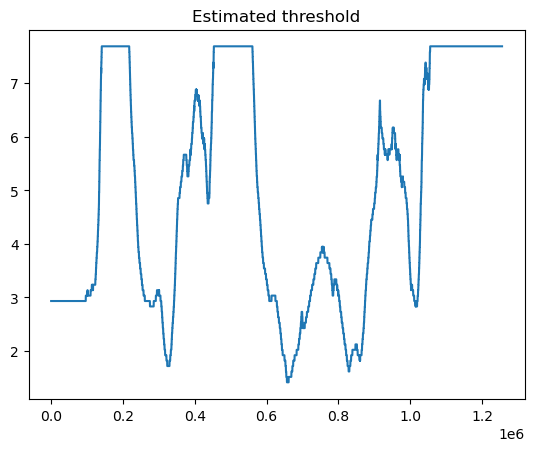

In [3]:
jumpadjust = JumpAdjust(x)
adjusted, optimal_tau = jumpadjust.truncate_MLE()
df_adjust = pd.DataFrame({"unadjusted":x-x[0]+adjusted[0], "jump adjusted":adjusted})
df_adjust.plot(title="Jump adjust (daily threshold estimation using MLE)")
plt.figure()
pd.Series(optimal_tau).plot(title="Estimated threshold")